<a href="https://colab.research.google.com/github/unburied/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/Linear_Algebra_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Algebra

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

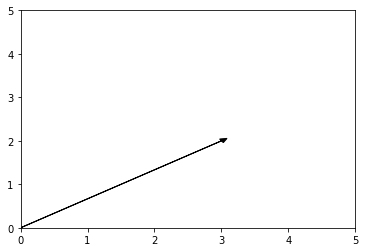

In [3]:
a = np.array([3,2])

plt.arrow(0,0,a[0],a[1], color = 'k',
          head_width = .1, head_length = .1)

plt.xlim(0,5)
plt.ylim(0,5)
plt.show();


## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [5]:
b = np.array([17,-4,-2,1])
b_norm = np.linalg.norm(b)
print(b_norm)

17.60681686165901


The norm of a vector represents the length of the vector in its vector space.

## 1.3 Find $\vec{c} \cdot \vec{d}$ - Are these vectors orthogonal? Why or why not?

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [6]:
c = np.array([3,7,-2,12])
d = np.array([9,-7,4,6])

np.dot(c,d)

42

These vectors are not orthogonal. Two vectors are orthogonal if, and only if, their dot product is equal to zero. 

## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [8]:
E = np.array([[7,4,2],[1,3,-1],[2,6,-4]])

E_inv = np.linalg.inv(E)
E_trans = np.transpose(E)

print(E_inv)
print(E_trans)

[[ 0.17647059 -0.82352941  0.29411765]
 [-0.05882353  0.94117647 -0.26470588]
 [ 0.          1.         -0.5       ]]
[[ 7  1  2]
 [ 4  3  6]
 [ 2 -1 -4]]


# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



In [9]:
customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

df = pd.DataFrame({'customers': customers, 'snow': snow})

df.head()

,customers,snow
0,820,0
1,760,1
2,1250,7
3,990,1
4,1080,0


In [26]:
df.customers.mean(), df.customers.std(), df.customers.var()

(1135.7142857142858, 314.26406851866597, 98761.90476190478)

In [27]:
df.snow.mean(),df.snow.std(),df.snow.var()

(2.7142857142857144, 2.9277002188455996, 8.571428571428571)

## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

In [28]:
df.customers.var() / df.snow.var()

11522.222222222224

The variances of customers to inches of snow is not directly comparable due to the fact they operate pn different scales. The  difference is 4 orders magnitude apart. 

## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [29]:
df.cov()

,customers,snow
customers,98761.904762,670.238095
snow,670.238095,8.571429


# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [33]:
data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

# Look at the data
df.head()

,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,North Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [36]:
#One liner for initializing StandardScaler while dropping categorical column
X = StandardScaler().fit_transform(df.drop(columns='Country'))
X

array([[ 0.65827466, -0.01749546, -0.25954622,  0.64458535, -0.63242919,
         0.13055067, -0.45007561,  0.86331183,  0.37773603, -0.33626508,
         0.80547723,  0.73740709, -0.64432226, -0.05191741, -0.43523112,
         0.10499766, -0.13830319],
       [ 0.53580495, -1.27716878,  1.19885635,  1.15244047,  1.53589947,
         1.54795798,  0.43569619,  1.09352832,  1.40168163,  0.08406627,
         1.17160324,  0.9292974 ,  1.67946294,  1.60943981, -1.40423624,
         0.84182336,  0.96812236],
       [ 0.53580495, -0.22744102,  0.54381113, -0.33205912, -1.09707105,
        -0.54085279, -1.33584741, -0.70983418, -0.49636387,  1.51319287,
        -0.87870243, -0.0575671 , -0.85557546, -0.46725672,  1.19072664,
         0.71656299,  0.74683725],
       [-1.72988456,  1.52210526, -1.48312126, -1.4649667 ,  0.19360077,
        -1.13765587,  1.35022682, -1.24700598, -1.28305378, -1.26099406,
        -1.09837804, -1.60913739, -0.17956522, -1.09026568,  0.64874072,
        -1.66338402

## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

In [46]:
#initialize PCA with 2 components per above parameters
pca = PCA(n_components = 2)

#get components from standardized data and store into vars for plotting
components = pca.fit_transform(X)
comp_1 = components[:,0]
comp_2 = components[:,1]

comp_1, comp_2

(array([-0.95448984, -4.52095094,  0.48797835,  4.98746242]),
 array([ 0.32831832, -1.73537967,  3.23367195, -1.8266106 ]))

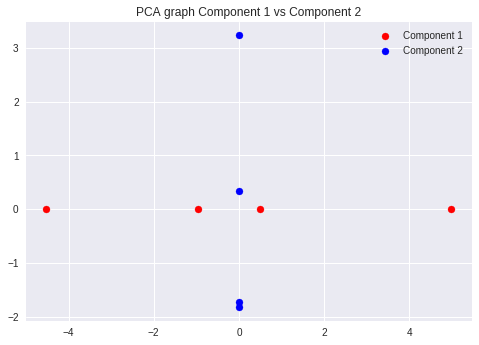

In [55]:
#zeroes used to plot components along xy axis
zeroes =  [0,0,0,0]

#just cause
plt.style.use('seaborn')

#plot components
plt.scatter(comp_1,zeroes, c= 'r')
plt.scatter(zeroes, comp_2, c= 'b')

#dress up
plt.legend(labels = ['Component 1', 'Component 2'])
plt.title('PCA graph Component 1 vs Component 2')
plt.show();

# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [57]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


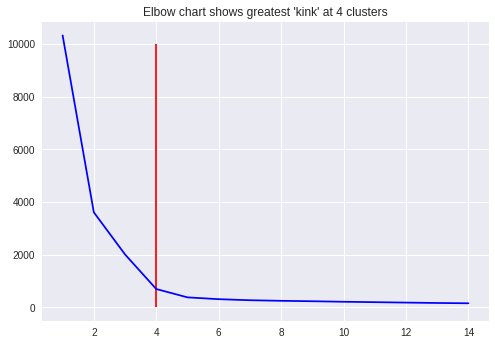

In [66]:
#Determine number of clusters using elbow chart
sum_squared_dist = []
K = range(1,15)
for k in K:
  km = KMeans(n_clusters = k)
  km = km.fit(points)
  sum_squared_dist.append(km.inertia_)

plt.plot(K, sum_squared_dist, 'bx-')
plt.title("Elbow chart shows greatest 'kink' at 4 clusters")
plt.vlines(4,0,10000, color = 'r')
plt.show();

In [69]:
#initalize KMeans with 4 clusters using dataframe
clusters =  KMeans(n_clusters = 4).fit(points)

#get cluster labels from Kmeans values and add to dataframe
labels = clusters.labels_
labels = pd.Series(labels)
points['clusters'] = labels.values

points.head()

,x,y,clusters
0,-7.846803,-3.421277,3
1,-3.554323,-6.884729,0
2,-0.192822,-9.671030,0
3,-6.401456,-5.223972,3
4,-0.804026,-9.704457,0


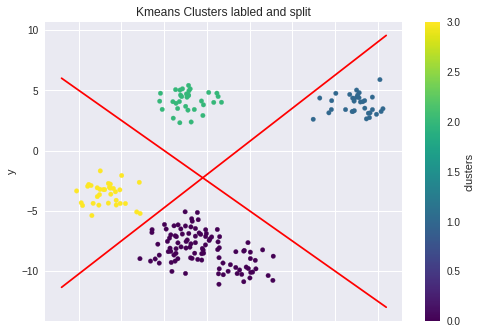

In [95]:
#plot points with labels assigned as colors
points.plot.scatter('x','y', c = 'clusters', cmap = 'viridis')

#get min max values for X from dataframe
min_x = int(round(points.x.min())) -1
max_x = int(round(points.x.max())) +1

#Create list with range min max for plotting
X = [_ for _ in range(min_x, max_x)]

#Line equation for dividing first group of clusts (eyeballed)
Line_1 = [-x - 5 for x in X]
plt.plot(X, Line_1, color = 'r')

#Line equation for dividing second group of clusts(eyeballed)
Line_2 = [1.1 * x + .75  for x in X]
plt.plot(X,Line_2, color = 'r')

plt.title('Kmeans Clusters labled and split')#Just made shrimp today
plt.show();